In [1]:
# import the relevant packages

import pandas as pd

# first download the match data. We'll use fixturedownload.com for data since 2016

frames = []

for year in range(2016,2025):
    url="https://fixturedownload.com/download/epl-%s-GMTStandardTime.csv" % year
    print(url)
    frame = pd.read_csv(url)
    frame['Season']=year
    frames.append(frame)
df = pd.concat(frames)
df.head()

https://fixturedownload.com/download/epl-2016-GMTStandardTime.csv
https://fixturedownload.com/download/epl-2017-GMTStandardTime.csv
https://fixturedownload.com/download/epl-2018-GMTStandardTime.csv
https://fixturedownload.com/download/epl-2019-GMTStandardTime.csv
https://fixturedownload.com/download/epl-2020-GMTStandardTime.csv
https://fixturedownload.com/download/epl-2021-GMTStandardTime.csv
https://fixturedownload.com/download/epl-2022-GMTStandardTime.csv
https://fixturedownload.com/download/epl-2023-GMTStandardTime.csv
https://fixturedownload.com/download/epl-2024-GMTStandardTime.csv


,Match Number,Round Number,Date,Location,Home Team,Away Team,Result,Season
0,1,1,13/08/2016 12:30,KCOM Stadium,Hull,Leicester,2 - 1,2016
1,2,1,13/08/2016 15:00,Turf Moor,Burnley,Swansea,0 - 1,2016
2,3,1,13/08/2016 15:00,Selhurst Park,Crystal Palace,West Brom,0 - 1,2016
3,4,1,13/08/2016 15:00,Goodison Park,Everton,Spurs,1 - 1,2016
4,5,1,13/08/2016 15:00,Riverside Stadium,Middlesbrough,Stoke,1 - 1,2016


In [2]:
df.tail()

,Match Number,Round Number,Date,Location,Home Team,Away Team,Result,Season
375,376,38,25/05/2025 16:00,St. James' Park,Newcastle,Everton,NaN,2024
376,377,38,25/05/2025 16:00,The City Ground,Nott'm Forest,Chelsea,NaN,2024
377,378,38,25/05/2025 16:00,St. Mary's Stadium,Southampton,Arsenal,NaN,2024
378,379,38,25/05/2025 16:00,Tottenham Hotspur Stadium,Spurs,Brighton,NaN,2024
379,380,38,25/05/2025 16:00,Molineux Stadium,Wolves,Brentford,NaN,2024


In [3]:
# Filter out the matches that haven't been played yet.
df = df[pd.notnull(df.Result)]
df.tail()

,Match Number,Round Number,Date,Location,Home Team,Away Team,Result,Season
105,105,11,09/11/2024 20:00,Anfield,Liverpool,Aston Villa,2 - 0,2024
106,106,11,10/11/2024 14:00,Old Trafford,Man Utd,Leicester,3 - 0,2024
107,107,11,10/11/2024 14:00,The City Ground,Nott'm Forest,Newcastle,1 - 3,2024
108,108,11,10/11/2024 14:00,Tottenham Hotspur Stadium,Spurs,Ipswich,1 - 2,2024
109,103,11,10/11/2024 16:30,Stamford Bridge,Chelsea,Arsenal,1 - 1,2024


In [4]:
# Split the 'Score' column into 'Home Goals' and 'Away Goals' columns
df[['home_goals', 'away_goals']] = df['Result'].str.split(' - ', expand=True).astype(float)

# Determine the match outcome from the home and away goals

def get_outcome(row):
    if row['home_goals'] > row['away_goals']:
        return 'home_win'
    elif row['home_goals'] < row['away_goals']:
        return 'away_win'
    else:
        return 'draw'

# Create an outcome column following the above to record match winner
df['result'] = df.apply(get_outcome, axis=1)

In [5]:
df.head()

,Match Number,Round Number,Date,Location,Home Team,Away Team,Result,Season,home_goals,away_goals,result
0,1,1,13/08/2016 12:30,KCOM Stadium,Hull,Leicester,2 - 1,2016,2.0,1.0,home_win
1,2,1,13/08/2016 15:00,Turf Moor,Burnley,Swansea,0 - 1,2016,0.0,1.0,away_win
2,3,1,13/08/2016 15:00,Selhurst Park,Crystal Palace,West Brom,0 - 1,2016,0.0,1.0,away_win
3,4,1,13/08/2016 15:00,Goodison Park,Everton,Spurs,1 - 1,2016,1.0,1.0,draw
4,5,1,13/08/2016 15:00,Riverside Stadium,Middlesbrough,Stoke,1 - 1,2016,1.0,1.0,draw


In [6]:
# Extract unique team names from df
team_names = df['Home Team'].unique()

# Display the unique team names
print("Teams:")
for team in team_names:
    print(team)
print('Number of Teams: ', len(team_names))

Teams:
Hull
Burnley
Crystal Palace
Everton
Middlesbrough
Southampton
Man City
Bournemouth
Arsenal
Chelsea
Man Utd
Stoke
Swansea
Spurs
Watford
West Brom
Leicester
Sunderland
West Ham
Liverpool
Brighton
Newcastle
Huddersfield
Fulham
Wolves
Cardiff
Aston Villa
Norwich
Sheffield Utd
Leeds
Brentford
Nottingham Forest
Luton
Ipswich
Nott'm Forest
Number of Teams:  35


In [7]:
# Check for missing values in the 'Home Team' column
missing_teams = df[df['Home Team'].isna()]

# Display missing teams, if any
if not missing_teams.empty:
    print("Missing Teams:")
    print(missing_teams['Home Team'])
else:
    print("No missing teams.")

No missing teams.


In [8]:
#Now I want to work out the home field advantage expressed in goals

# Calc the average home and away goals scored per game
avg_home_goals_for = df['home_goals'].mean()
avg_away_goals_for = df['away_goals'].mean()

# Calc home-field advantage
home_field_advantage = avg_home_goals_for - avg_away_goals_for

print("Avg Home Goals Scored:", avg_home_goals_for)
print("Avg Away Goals Scored:", avg_away_goals_for)
print("Home-Field Advantage:", home_field_advantage)

Avg Home Goals Scored: 1.5634920634920635
Avg Away Goals Scored: 1.2704761904761905
Home-Field Advantage: 0.29301587301587295


In [9]:
# Dictionary to store data for each team
team_data = {}

# Loop through each team
for team in team_names:
    # Filter rows for the teams as Home Team
    home_team_rows = df[df['Home Team'] == team]

    # Calculate average goals for and against as Home Team
    avg_home_goals_for = home_team_rows['home_goals'].mean()
    avg_away_goals_against = home_team_rows['away_goals'].mean()

    # Filter rows for the specific team as Away Team
    away_team_rows = df[df['Away Team'] == team]

    # Calculate average goals for and against as Away Team
    avg_away_goals_for = away_team_rows['away_goals'].mean()
    avg_home_goals_against = away_team_rows['home_goals'].mean()

    # Calculate average goals for and against for each team
    ATT_rating = (avg_home_goals_for + avg_away_goals_for) / 2
    DEF_rating = (avg_home_goals_against + avg_away_goals_against) / 2

    # Store calculated data in the dictionary
    team_data[team] = {
        'Home Goals For': avg_home_goals_for,
        'Away Goals For': avg_away_goals_for,
        'Home Goals Against': avg_home_goals_against,
        'Away Goals Against': avg_away_goals_against,
        'ATT Rating': ATT_rating,
        'DEF Rating': DEF_rating
    }

# Display calculated data for each team
print("Team Data: AVG Goals & Ratings")
print()
for team, data in team_data.items():
    print(f"{team}:")
    print(f"  Home Goals For: {data['Home Goals For']:.5f}")
    print(f"  Away Goals For: {data['Away Goals For']:.5f}")
    print(f"  Home Goals Against: {data['Home Goals Against']:.5f}")
    print(f"  Away Goals Against: {data['Away Goals Against']:.5f}")
    print(f"  ATT Rating: {data['ATT Rating']:.2f}")
    print(f"  DEF Rating: {data['DEF Rating']:.2f}")
    print()


Team Data: AVG Goals & Ratings

Hull:
  Home Goals For: 1.47368
  Away Goals For: 0.47368
  Home Goals Against: 2.36842
  Away Goals Against: 1.84211
  ATT Rating: 0.97
  DEF Rating: 2.11

Burnley:
  Home Goals For: 1.06015
  Away Goals For: 0.97744
  Home Goals Against: 1.58647
  Away Goals Against: 1.40602
  ATT Rating: 1.02
  DEF Rating: 1.50

Crystal Palace:
  Home Goals For: 1.23418
  Away Goals For: 1.13376
  Home Goals Against: 1.62420
  Away Goals Against: 1.26582
  ATT Rating: 1.18
  DEF Rating: 1.45

Everton:
  Home Goals For: 1.38854
  Away Goals For: 1.01266
  Home Goals Against: 1.62658
  Away Goals Against: 1.18471
  ATT Rating: 1.20
  DEF Rating: 1.41

Middlesbrough:
  Home Goals For: 0.89474
  Away Goals For: 0.52632
  Home Goals Against: 1.57895
  Away Goals Against: 1.21053
  ATT Rating: 0.71
  DEF Rating: 1.39

Southampton:
  Home Goals For: 1.15217
  Away Goals For: 1.06475
  Home Goals Against: 1.81295
  Away Goals Against: 1.49275
  ATT Rating: 1.11
  DEF Rating: 

In [10]:
# Target just OFF & DEF for each team from the above

for team, stats in team_data.items():
    att_rating = stats.get('ATT Rating')
    def_rating = stats.get('DEF Rating')
    
    print(f"Team: {team}")
    print(f"ATT Rating: {att_rating}")
    print(f"DEF Rating: {def_rating}")
    print("-" * 30)

Team: Hull
ATT Rating: 0.9736842105263157
DEF Rating: 2.1052631578947367
------------------------------
Team: Burnley
ATT Rating: 1.018796992481203
DEF Rating: 1.4962406015037595
------------------------------
Team: Crystal Palace
ATT Rating: 1.1839675884866563
DEF Rating: 1.4450133032330887
------------------------------
Team: Everton
ATT Rating: 1.2005966298476176
DEF Rating: 1.4056478271385955
------------------------------
Team: Middlesbrough
ATT Rating: 0.7105263157894737
DEF Rating: 1.3947368421052633
------------------------------
Team: Southampton
ATT Rating: 1.1084610572411635
DEF Rating: 1.6528516317380877
------------------------------
Team: Man City
ATT Rating: 2.467648955897767
DEF Rating: 0.8316737885995324
------------------------------
Team: Bournemouth
ATT Rating: 1.2642156862745098
DEF Rating: 1.7394257703081233
------------------------------
Team: Arsenal
ATT Rating: 1.8834959284044184
DEF Rating: 1.1583084737563492
------------------------------
Team: Chelsea
ATT Ra

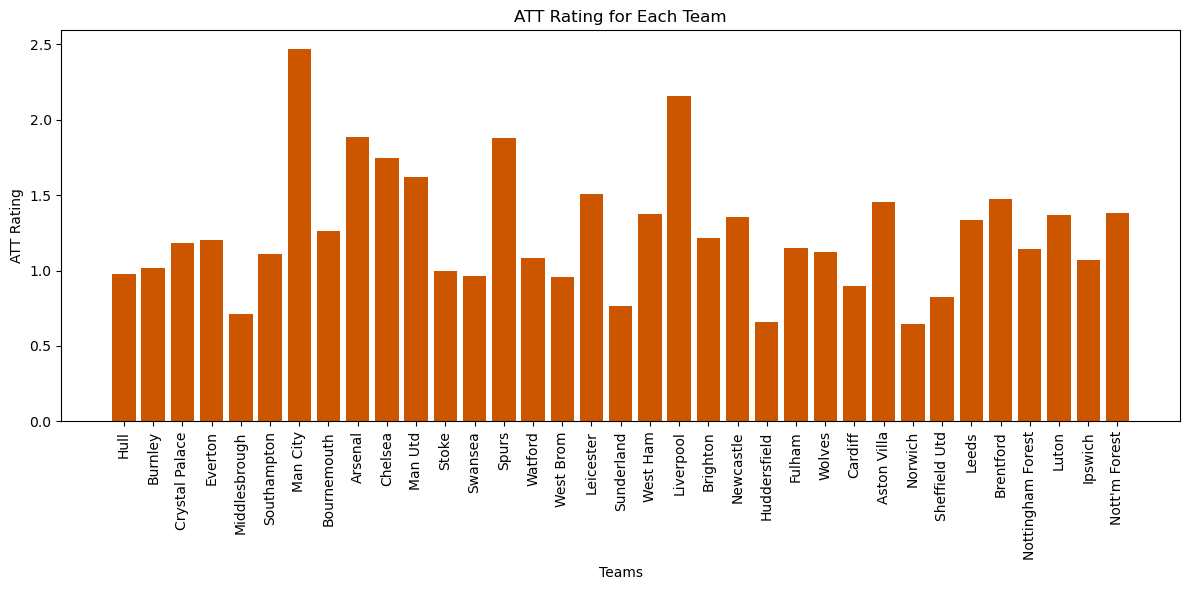

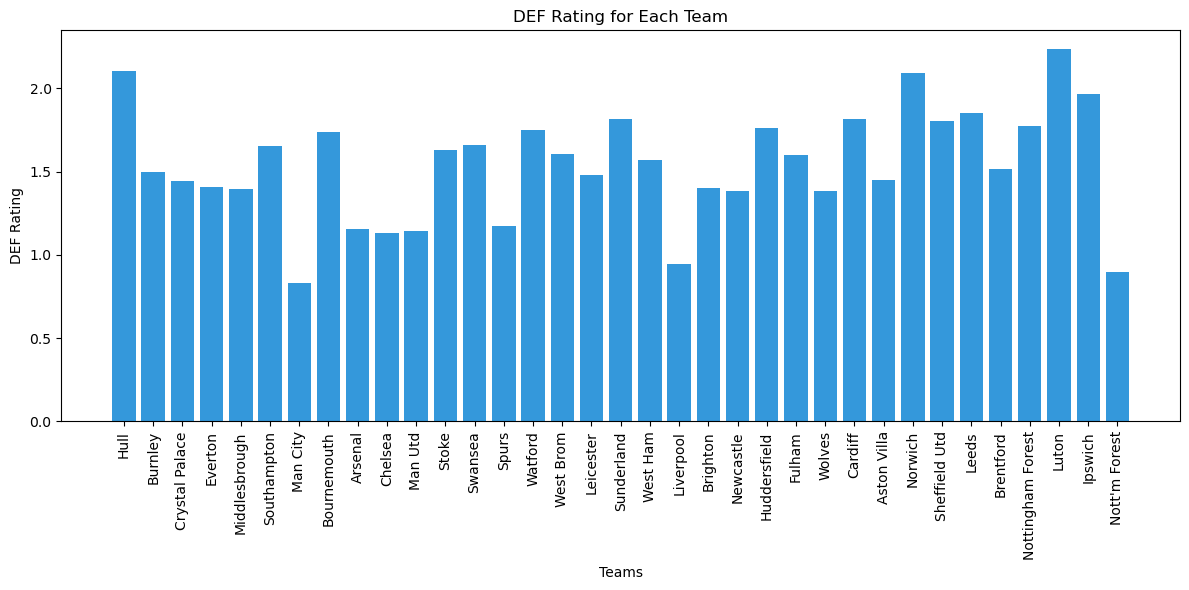

In [11]:
# we can plot these values on a graph to make them easer to read, for example ATT Ratings and DF Ratings:
        
import matplotlib.pyplot as plt

# Extract teams and OFF Rating values from team_data
teams = list(team_data.keys())
att_ratings = [team_data[team]['ATT Rating'] for team in teams]

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(teams, att_ratings, color='#CC5500')
plt.xticks(rotation=90)  # Rotate team names for better readability
plt.xlabel('Teams')
plt.ylabel('ATT Rating')
plt.title('ATT Rating for Each Team')
plt.tight_layout()  # Adjust layout to fit labels

plt.show()



# Extract teams and DEF Rating values from team_data
teams = list(team_data.keys())
def_ratings = [team_data[team]['DEF Rating'] for team in teams]

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(teams, def_ratings, color='#3498db')
plt.xticks(rotation=90)  # Rotate team names for better readability
plt.xlabel('Teams')
plt.ylabel('DEF Rating')
plt.title('DEF Rating for Each Team')
plt.tight_layout()  # Adjust layout to fit labels

plt.show()


In [12]:
#Going to now use our df data to predict the results for the next round of fixtures (gw 11 of the 24/25 season at time of writing)

In [13]:
# to start we gather the next round of fixtures (gw 11)

fixtures_by_gw=pd.read_csv("https://fixturedownload.com/download/epl-2024-GMTStandardTime.csv")
fixtures_by_gw = fixtures_by_gw[fixtures_by_gw['Round Number'] == 12]
fixtures_by_gw

,Match Number,Round Number,Date,Location,Home Team,Away Team,Result
110,117,12,23/11/2024 12:30,King Power Stadium,Leicester,Chelsea,NaN
111,111,12,23/11/2024 15:00,Emirates Stadium,Arsenal,Nott'm Forest,NaN
112,112,12,23/11/2024 15:00,Villa Park,Aston Villa,Crystal Palace,NaN
113,113,12,23/11/2024 15:00,Vitality Stadium,Bournemouth,Brighton,NaN
114,114,12,23/11/2024 15:00,Goodison Park,Everton,Brentford,NaN
115,115,12,23/11/2024 15:00,Craven Cottage,Fulham,Wolves,NaN
116,118,12,23/11/2024 17:30,Etihad Stadium,Man City,Spurs,NaN
117,120,12,24/11/2024 14:00,St. Mary's Stadium,Southampton,Liverpool,NaN
118,116,12,24/11/2024 16:30,Portman Road,Ipswich,Man Utd,NaN
119,119,12,25/11/2024 20:00,St. James' Park,Newcastle,West Ham,NaN


In [14]:
# now refine to just the home and away team names

fixtures_by_gw=fixtures_by_gw[['Home Team', 'Away Team']]

fixtures_by_gw

,Home Team,Away Team
110,Leicester,Chelsea
111,Arsenal,Nott'm Forest
112,Aston Villa,Crystal Palace
113,Bournemouth,Brighton
114,Everton,Brentford
115,Fulham,Wolves
116,Man City,Spurs
117,Southampton,Liverpool
118,Ipswich,Man Utd
119,Newcastle,West Ham



Heatmap for Leicester vs Chelsea:


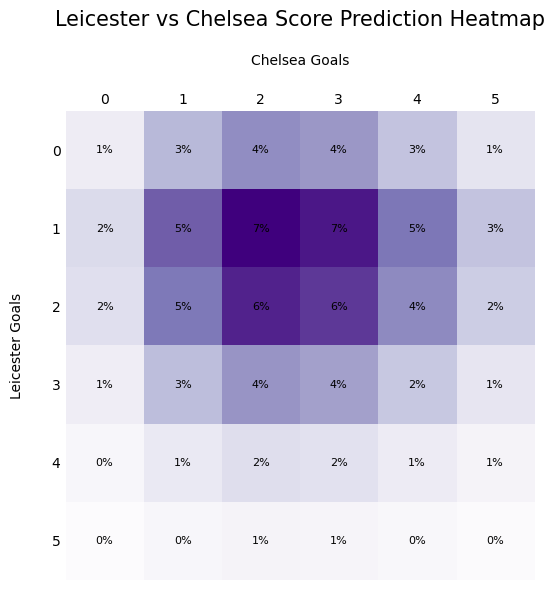


1X2 Probabilities for Leicester vs Chelsea:
Home Win Probability: 0.23
Away Win Probability: 0.53
Draw Probability: 0.17

1X2 Prices (3% MOU):
Home Price : 4.27
Draw Price : 5.56
Away Price : 1.85
----------------------------------------

Heatmap for Arsenal vs Nott'm Forest:


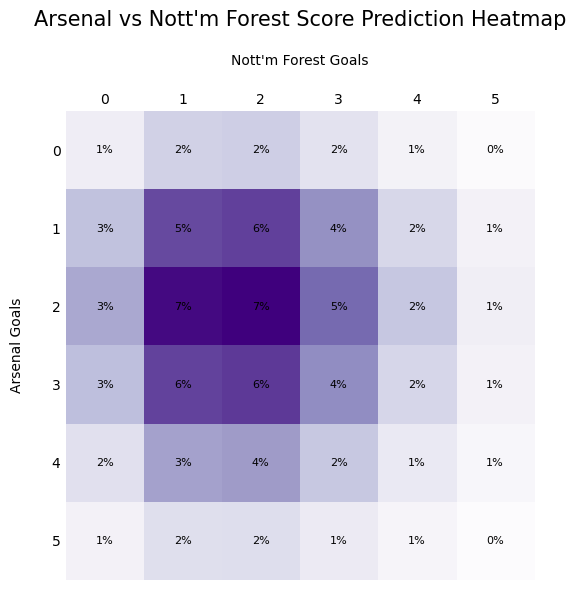


1X2 Probabilities for Arsenal vs Nott'm Forest:
Home Win Probability: 0.44
Away Win Probability: 0.31
Draw Probability: 0.19

1X2 Prices (3% MOU):
Home Price : 2.21
Draw Price : 5.12
Away Price : 3.11
----------------------------------------

Heatmap for Aston Villa vs Crystal Palace:


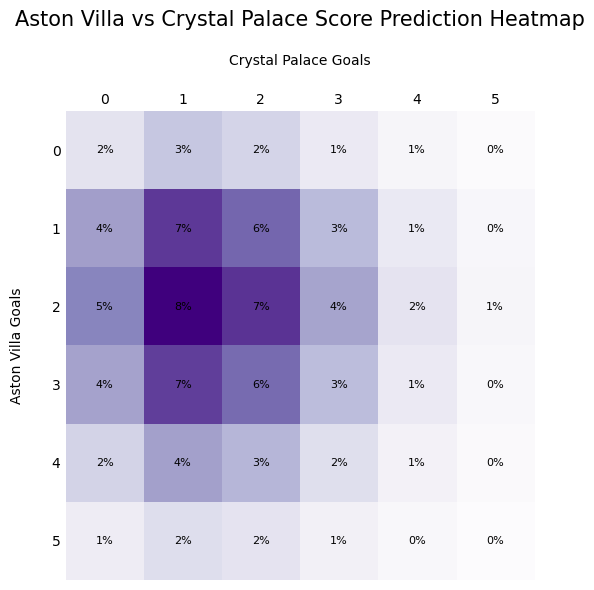


1X2 Probabilities for Aston Villa vs Crystal Palace:
Home Win Probability: 0.50
Away Win Probability: 0.26
Draw Probability: 0.19

1X2 Prices (3% MOU):
Home Price : 1.92
Draw Price : 5.04
Away Price : 3.76
----------------------------------------

Heatmap for Bournemouth vs Brighton:


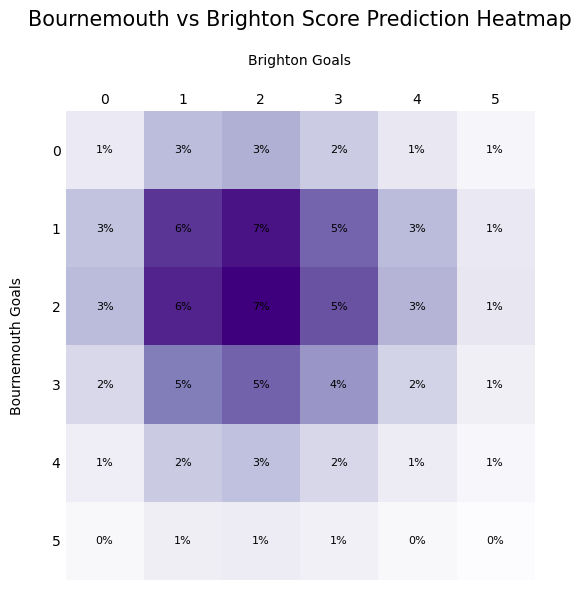


1X2 Probabilities for Bournemouth vs Brighton:
Home Win Probability: 0.36
Away Win Probability: 0.40
Draw Probability: 0.20

1X2 Prices (3% MOU):
Home Price : 2.71
Draw Price : 4.94
Away Price : 2.45
----------------------------------------

Heatmap for Everton vs Brentford:


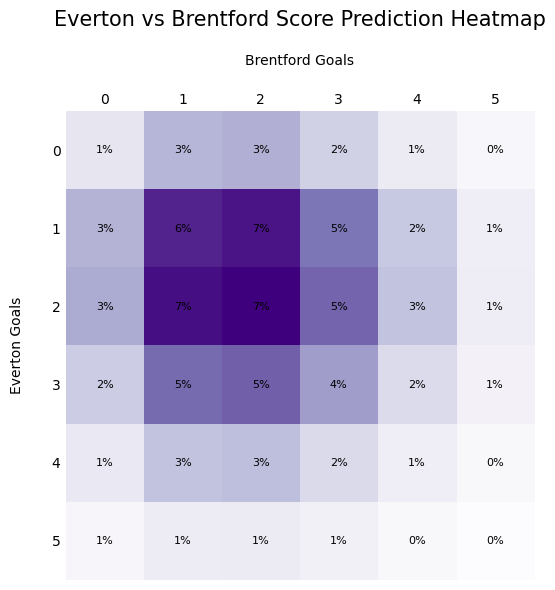


1X2 Probabilities for Everton vs Brentford:
Home Win Probability: 0.39
Away Win Probability: 0.37
Draw Probability: 0.20

1X2 Prices (3% MOU):
Home Price : 2.51
Draw Price : 4.85
Away Price : 2.62
----------------------------------------

Heatmap for Fulham vs Wolves:


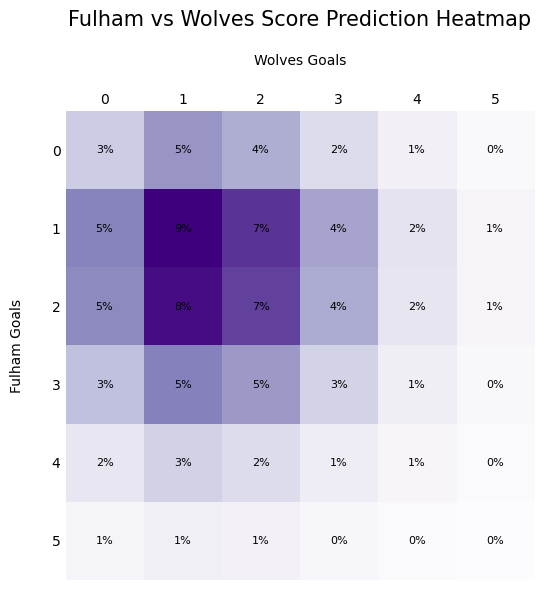


1X2 Probabilities for Fulham vs Wolves:
Home Win Probability: 0.43
Away Win Probability: 0.34
Draw Probability: 0.22

1X2 Prices (3% MOU):
Home Price : 2.28
Draw Price : 4.44
Away Price : 2.90
----------------------------------------

Heatmap for Man City vs Spurs:


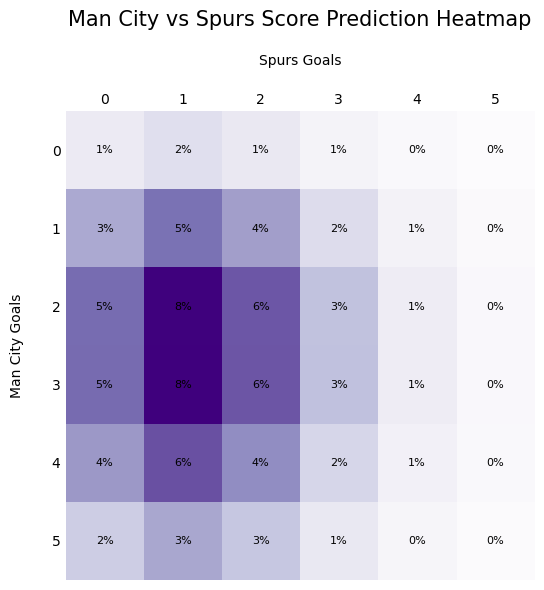


1X2 Probabilities for Man City vs Spurs:
Home Win Probability: 0.60
Away Win Probability: 0.16
Draw Probability: 0.15

1X2 Prices (3% MOU):
Home Price : 1.61
Draw Price : 6.35
Away Price : 6.20
----------------------------------------

Heatmap for Southampton vs Liverpool:


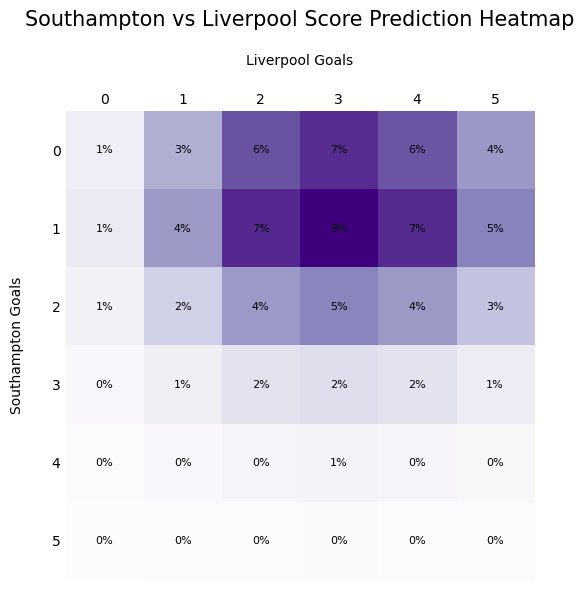


1X2 Probabilities for Southampton vs Liverpool:
Home Win Probability: 0.09
Away Win Probability: 0.66
Draw Probability: 0.11

1X2 Prices (3% MOU):
Home Price : 11.29
Draw Price : 8.61
Away Price : 1.46
----------------------------------------

Heatmap for Ipswich vs Man Utd:


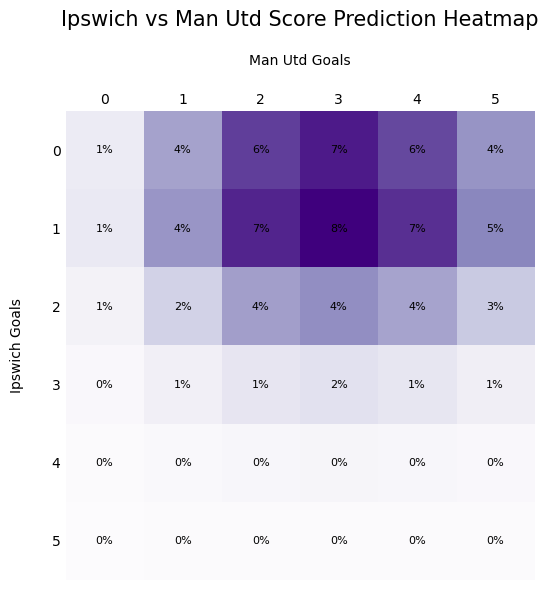


1X2 Probabilities for Ipswich vs Man Utd:
Home Win Probability: 0.08
Away Win Probability: 0.68
Draw Probability: 0.11

1X2 Prices (3% MOU):
Home Price : 11.96
Draw Price : 8.69
Away Price : 1.44
----------------------------------------

Heatmap for Newcastle vs West Ham:


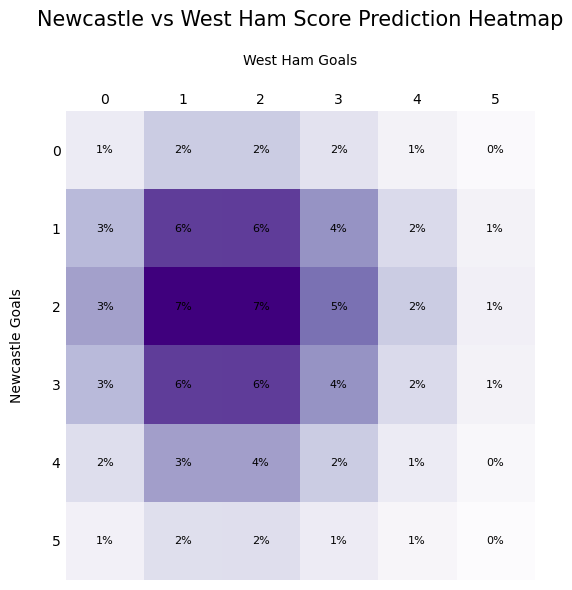


1X2 Probabilities for Newcastle vs West Ham:
Home Win Probability: 0.45
Away Win Probability: 0.31
Draw Probability: 0.19

1X2 Prices (3% MOU):
Home Price : 2.17
Draw Price : 5.08
Away Price : 3.16
----------------------------------------


In [18]:
#Now time to run the match simulator for each fixture in this game week

# import relevant packages
# aware I've repeated some of these but I like to import them still to know what is needed

import pandas as pd
import numpy as np
from scipy.stats import poisson
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib as mpl


# Define the number of goals for the Poisson matrix - 7 will display 0 - 6 goals
number_of_goals = 6

# Define functions

# create 2 poisson dist for the number of goals each team will score
# the XG is the value that each team needs to score for their OFF rating to remain exactly the same post fixture
def simulate_poisson_distribution(home_team_xg, away_team_xg, home_team_defense, away_team_defense):
    score_matrix = np.zeros((number_of_goals, number_of_goals))
    
    for home_goals in range(number_of_goals):
        for away_goals in range(number_of_goals):
            # Adjusted for both offensive and defensive strengths
            home_prob = poisson.pmf(home_goals, home_team_xg * away_team_defense)  # Home team offense adjusted by away team defense
            away_prob = poisson.pmf(away_goals, away_team_xg * home_team_defense)  # Away team offense adjusted by home team defense
            
            score_matrix[home_goals][away_goals] = home_prob * away_prob
            
    return score_matrix


#Display the home and away goals on a heatmap grid
def display_heatmap(result_matrix, home_team, away_team):
    result_df = pd.DataFrame(result_matrix, index=range(result_matrix.shape[0]), columns=range(result_matrix.shape[1]))
    
    # Set up the figure with the desired size
    fig, ax = plt.subplots(figsize=(6, 6))

    # Plot the heatmap
    heatmap = ax.imshow(result_matrix, cmap="Purples", origin='upper')

    # Add titles and labels
    ax.set_title(f"{home_team} vs {away_team} Score Prediction Heatmap", fontsize=15, pad=20)
    ax.set_xlabel(f"{away_team} Goals", labelpad=20)
    ax.set_ylabel(f"{home_team} Goals", labelpad=20)

    # Move the away team goals (x-axis) to the top
    ax.xaxis.set_label_position('top')  # Move the x-axis label to the top
    ax.set_xticks(range(result_matrix.shape[1]))  # Set the tick positions for the away team goals
    ax.set_xticklabels(range(result_matrix.shape[1]))  # Set the tick labels for the away team goals
    ax.xaxis.set_ticks_position('top')  # Ensure the x-axis ticks appear at the top
    
    # Remove the little lines next to the numbers on both axes
    ax.tick_params(axis='x', length=0)  # Remove x-axis tick marks
    ax.tick_params(axis='y', length=0)  # Remove y-axis tick marks
    
    # Remove the outer spines (lines around the plot)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    # Add percentage values in each cell
    for i in range(result_matrix.shape[0]):
        for j in range(result_matrix.shape[1]):
            value = result_matrix[i, j]
            percentage = f"{value * 100:.0f}%"  # Convert to percentage
            ax.text(j, i, percentage, ha='center', va='center', color='black', fontsize=8)

    # Tight layout for consistent appearance
    plt.tight_layout()
    plt.show()


def calculate_match_result_probabilities(result_matrix):
    home_win_prob = np.sum(np.tril(result_matrix, -1))
    away_win_prob = np.sum(np.triu(result_matrix, 1))
    draw_prob = np.sum(np.diag(result_matrix))
    return home_win_prob, away_win_prob, draw_prob


# Define the simulate_poisson_distribution function to accept adjusted xG values
def simulate_poisson_distribution(home_team_xg, away_team_xg, number_of_goals=number_of_goals):
    score_matrix = np.zeros((number_of_goals, number_of_goals))
    for home_goals in range(number_of_goals):
        for away_goals in range(number_of_goals):
            home_prob = poisson.pmf(home_goals, home_team_xg)
            away_prob = poisson.pmf(away_goals, away_team_xg)
            score_matrix[home_goals][away_goals] = home_prob * away_prob
    return score_matrix



# Simulation loop for each fixture
for index, row in fixtures_by_gw.iterrows():
    home_team = row['Home Team']
    away_team = row['Away Team']
    
    #I want the XG to be the number of goals that a team needs to score to keep their ATT rating the exact same
    
    # Retrieve the ATT and DEF Ratings for both teams
    home_team_att = team_data.get(home_team, {}).get('Home Goals For', np.nan)
    away_team_att = team_data.get(away_team, {}).get('Away Goals For', np.nan)
    home_team_def = team_data.get(home_team, {}).get('Home Goals Against', np.nan)
    away_team_def = team_data.get(away_team, {}).get('Away Goals Against', np.nan)
    
    # Ensure ATT and DEF Ratings are available
    if np.isnan(home_team_att) or np.isnan(away_team_att) or np.isnan(home_team_def) or np.isnan(away_team_def):
        print(f"Missing ATT or DEF Rating data for {home_team} vs {away_team}. Skipping this match.")
        continue

    # Calculate xG for each team to maintain ATT Rating, adjusted for opponent's DEF Rating:
    home_team_xg = (home_team_att * away_team_def) + home_field_advantage
    away_team_xg = (away_team_att * home_team_def)
    
    # Run the Poisson simulation
    result_matrix = simulate_poisson_distribution(home_team_xg, away_team_xg)
    
    # Display the result matrix as a heatmap for the current match
    print(f"\nHeatmap for {home_team} vs {away_team}:")
    display_heatmap(result_matrix, home_team, away_team)
    
    # Calculate 1x2 probabilities
    home_win_prob, away_win_prob, draw_prob = calculate_match_result_probabilities(result_matrix)
    print(f"\n1X2 Probabilities for {home_team} vs {away_team}:")
    print(f"Home Win Probability: {home_win_prob:.2f}")
    print(f"Away Win Probability: {away_win_prob:.2f}")
    print(f"Draw Probability: {draw_prob:.2f}")
    
    # Calculate and print decimal betting prices, which is 1 / (prob * margin)
    # margin is what bookmakers use to sway the odds slightly in their favor, indistry standard margin is about 3%
    home_price = 1 / (home_win_prob * 1.03) if home_win_prob > 0 else float('inf')
    draw_price = 1 / (draw_prob * 1.03) if draw_prob > 0 else float('inf')
    away_price = 1 / (away_win_prob * 1.03) if away_win_prob > 0 else float('inf')

    print("\n1X2 Prices (3% MOU):")
    print(f"Home Price : {home_price:.2f}")
    print(f"Draw Price : {draw_price:.2f}")
    print(f"Away Price : {away_price:.2f}")
    print("-" * 40)
